In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sn
from collections import Counter 
from sklearn.linear_model import LinearRegression
import scipy.stats as st

import pylab

import statsmodels.api as sm


In [2]:
#These are the 5 sets of raw data that we have.

file = "csv_data/2015.csv"
file1 = "csv_data/2016.csv"
file2 = "csv_data/2017.csv"
file3 = "csv_data/2018.csv"
file4 = "csv_data/2019.csv"

In [3]:
# Dataframes by year.

df_2015 = pd.read_csv(file)
df_2016 = pd.read_csv(file1)
df_2017 = pd.read_csv(file2)
df_2018 = pd.read_csv(file3)
df_2019 = pd.read_csv(file4)

In [4]:
# Here we started the process of checking what our csvs looked like.
#We were interested in the # of rows and columns in each csv file. 

print("2015: ", df_2015.shape)
print("2016: ", df_2016.shape)
print("2017: ", df_2017.shape)
print("2018: ", df_2018.shape)
print("2019: ", df_2019.shape)

2015:  (158, 12)
2016:  (157, 13)
2017:  (155, 12)
2018:  (156, 9)
2019:  (156, 9)


In [5]:
# Next, we checked for any empty values in each individual year. Here we can see that 2015 did not have any empty values. 
df_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
# After looking at the components of each year, we noticed the column names varied, so we decided to rename and drop columns
# so that all the years matched. 
df_2015.rename(columns={'Happiness Rank':'rank', 'Happiness Score':'score', 'Economy (GDP per Capita)': 'gdp',
                      'Health (Life Expectancy)': 'health', 'Trust (Government Corruption)': 'corruption',
                      "Dystopia Residual": "dystopia"},
                        inplace = True)
df_2015.columns = df_2015.columns.str.lower()
df_2015.columns

Index(['country', 'region', 'rank', 'score', 'standard error', 'gdp', 'family',
       'health', 'freedom', 'corruption', 'generosity', 'dystopia'],
      dtype='object')

In [7]:
df_2015.drop(columns = ['region', 'standard error'], inplace = True)
df_2015.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia
70,Mauritius,71,5.477,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145
76,Kyrgyzstan,77,5.286,0.47428,1.15115,0.65088,0.43477,0.04232,0.30030,2.23270
32,Colombia,33,6.477,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,2.85737
19,United Arab Emirates,20,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
24,Panama,25,6.786,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848


In [8]:
df_2016.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df_2016.columns = df_2016.columns.str.lower()
df_2016.rename(columns={'happiness rank':'rank', 'happiness score':'score', 'economy (gdp per capita)': 'gdp',
                      'health (life expectancy)':'health', 'trust (government corruption)': 'corruption',
                      "dystopia residual": "dystopia"},
                       inplace = True)
df_2016.columns

Index(['country', 'region', 'rank', 'score', 'lower confidence interval',
       'upper confidence interval', 'gdp', 'family', 'health', 'freedom',
       'corruption', 'generosity', 'dystopia'],
      dtype='object')

In [10]:
df_2016.drop(columns = ['lower confidence interval','upper confidence interval',
                      'region'],
           inplace = True)
df_2016.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia
151,Rwanda,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
36,Spain,37,6.361,1.34253,1.12945,0.87896,0.37545,0.06137,0.17665,2.39663
102,Nigeria,103,4.875,0.75216,0.64498,0.05108,0.27854,0.03050,0.23219,2.88586
148,Tanzania,149,3.666,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
144,Burkina Faso,145,3.739,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319


In [11]:
df_2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [12]:
# This particular year had column names with periods instead of spaces, so we got rid of the periods
# and substituted spaces. 

df_2017.columns = df_2017.columns.str.replace(".", "")

# let's convert into lower case
df_2017.columns = df_2017.columns.str.lower()
df_2017.rename(columns = {"happinessrank": "rank", "happinessscore": "score", "healthlifeexpectancy": "health",
                        "economygdppercapita": "gdp", "trustgovernmentcorruption": "corruption",
                        "dystopiaresidual": "dystopia"}, inplace = True)
df_2017.columns

Index(['country', 'rank', 'score', 'whiskerhigh', 'whiskerlow', 'gdp',
       'family', 'health', 'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [13]:
df_2017.drop(columns = ['whiskerhigh', 'whiskerlow'], inplace = True)
df_2017.sample(5)

,country,rank,score,gdp,family,health,freedom,generosity,corruption,dystopia
134,Niger,135,4.028,0.161925,0.993025,0.268505,0.363659,0.228674,0.138573,1.873983
78,China,79,5.273,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939
53,Latvia,54,5.850,1.260749,1.404715,0.638567,0.325708,0.153075,0.073843,1.993655
136,Chad,137,3.936,0.438013,0.953856,0.041135,0.162342,0.216114,0.053582,2.071238
31,Thailand,32,6.424,1.127869,1.425792,0.647239,0.580201,0.572123,0.031613,2.039508


In [14]:
# Here we found out we have one empty value in the corruptions column. We will
# need locate and clean up that empty value.
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [15]:
df_2018.columns = df_2018.columns.str.lower()
df_2018.rename(columns = {"overall rank": "rank", "country or region": "country",
                         "freedom to make life choices": "freedom", "perceptions of corruption": "corruption",
                        "gdp per capita": "gdp", "healthy life expectancy": "health",
                        "social support": "family"}, inplace=True)
df_2018.columns = df_2018.columns.str.replace(" ", "_")
df_2018.columns

Index(['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption'],
      dtype='object')

In [16]:
df_2019.columns = df_2019.columns.str.lower()
df_2019.rename(columns = {"overall rank": "rank", "country or region": "country",
                         "freedom to make life choices": "freedom", "perceptions of corruption": "corruption",
                        "gdp per capita": "gdp", "healthy life expectancy": "health",
                        "social support": "family"}, inplace=True)
df_2019.columns = df_2019.columns.str.replace(" ", "_")
df_2019.columns

Index(['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption'],
      dtype='object')

In [17]:
df_2019.isna().sum()

rank          0
country       0
score         0
gdp           0
family        0
health        0
freedom       0
generosity    0
corruption    0
dtype: int64

In [18]:
# We printed out all the columns to compare them and make sure they are 
# named the same.

def print_all_dataframe_columns():
    print("2015:\n", df_2015.columns.to_list())
    print("\n2016:\n", df_2016.columns.to_list())
    print("\n2017:\n", df_2017.columns.to_list())
    print("\n2018:\n", df_2018.columns.to_list())
    print("\n2019:\n", df_2019.columns.to_list())
    
print_all_dataframe_columns()

2015:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'corruption', 'generosity', 'dystopia']

2016:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'corruption', 'generosity', 'dystopia']

2017:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption', 'dystopia']

2018:
 ['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption']

2019:
 ['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption']


In [19]:
# Our goal is to stack all of the csv files, but we still want to distinguish
# which year each row of info came from, so we are adding a column with each year.

df_2015['year'] = '2015'
df_2016['year'] = '2016'
df_2017['year'] = '2017'
df_2018['year'] = '2018'
df_2019['year'] = '2019'

df_2017.columns


Index(['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption', 'dystopia', 'year'],
      dtype='object')

In [23]:
main_data = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019]).reset_index(drop=True)
main_data.shape
main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
236,Indonesia,79,5.314,0.95104,0.87625,0.49374,0.39237,0.00322,0.56521,2.03171,2016
271,Cameroon,114,4.513,0.52497,0.62542,0.12698,0.42736,0.06126,0.22680,2.51980,2016
635,Austria,10,7.246,1.37600,1.47500,1.01600,0.53200,0.22600,0.24400,2.26640,2019
69,Turkmenistan,70,5.548,0.95847,1.22668,0.53886,0.47610,0.30844,0.16979,1.86984,2015
234,Kosovo,77,5.401,0.90145,0.66062,0.54000,0.14396,0.06547,0.27992,2.80998,2016


In [24]:
# We noticed that for the years 2018 and 2019 the dystopia value is missing 


df_2018["dystopia"] = main_data["score"] - main_data["gdp"] - main_data["family"] - main_data["health"] - main_data["freedom"] - main_data["corruption"] - main_data["generosity"]

df_2019["dystopia"] = main_data["score"] - main_data["gdp"] - main_data["family"] - main_data["health"] - main_data["freedom"] - main_data["corruption"] - main_data["generosity"]



In [25]:
dim_main_data = pd.concat([df_2015, df_2016, df_2017]).reset_index(drop=True)
dim_main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
291,Gabon,134,4.121,1.158510,0.723680,0.349400,0.280980,0.093140,0.062440,1.453320,2016
360,Poland,46,5.973,1.291788,1.445712,0.699475,0.520342,0.059308,0.158466,1.797723,2017
272,Ethiopia,115,4.508,0.292830,0.379320,0.345780,0.367030,0.171700,0.295220,2.656140,2016
82,Montenegro,82,5.192,0.974380,0.905570,0.725210,0.182600,0.142960,0.161400,2.100170,2015
428,Myanmar,114,4.545,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075,1.115290,2017


In [26]:
main_data.country = main_data.country.str.lower().str.replace(" ", "_")

main_data.isna().sum()

country       0
rank          0
score         0
gdp           0
family        0
health        0
freedom       0
corruption    1
generosity    0
dystopia      0
year          0
dtype: int64

In [27]:
main_data[main_data.isna().values]

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
489,united_arab_emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2.24705,2018


In [28]:
main_data.loc[main_data.country == "united_arab_emirates"]

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
19,united_arab_emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2.247430,2015
185,united_arab_emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2.215070,2016
335,united_arab_emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,1.734704,2017
489,united_arab_emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,2.247050,2018
646,united_arab_emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,1.969680,2019


In [29]:
avg_corruption = main_data.loc[main_data.country == "united_arab_emirates", "corruption"].mean()
main_data.corruption.fillna(avg_corruption, inplace=True)


In [30]:
main_data.isna().sum().any()

False

In [31]:
main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
714,morocco,89,5.208,0.801000,0.782000,0.782000,0.418000,0.076000,0.036000,1.622600,2019
728,congo_(brazzaville),103,4.812,0.673000,0.799000,0.508000,0.372000,0.093000,0.105000,1.570360,2019
397,montenegro,83,5.237,1.121129,1.238376,0.667465,0.194989,0.088174,0.197911,1.729192,2017
114,zimbabwe,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910,2015
696,moldova,71,5.529,0.685000,1.328000,0.739000,0.245000,0.000000,0.181000,1.761370,2019


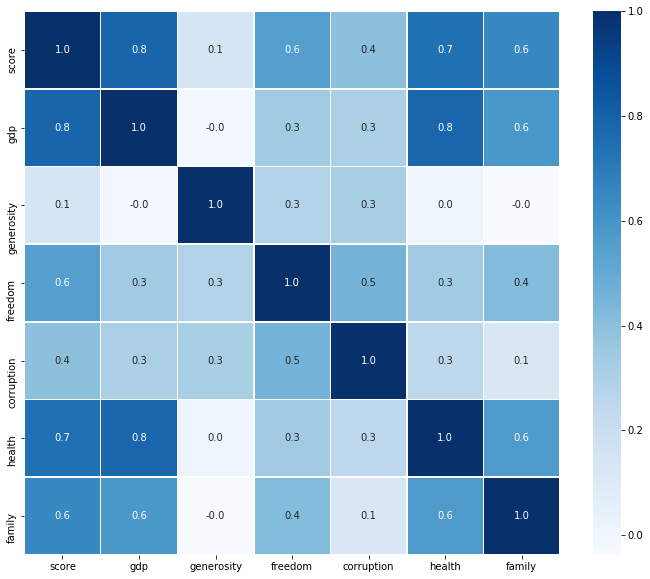

<Figure size 432x288 with 0 Axes>

In [32]:
#correlation map  2015-2019

categories = ["score", "gdp", "generosity", "freedom", "corruption", "health", "family"]
fig, ax = plt.subplots(figsize= (12, 10))
sn.heatmap(main_data[categories].corr(), annot=True, cmap="Blues", linewidths=.5, fmt=".1f", ax=ax)
plt.show()

plt.savefig('Graphs/heatmap_main_data.png')

#the happiness score has a strong linear relationship with GDP and Family (Social Support, and health (healthy life expectancy
#the happiness score is least correlated with generosity

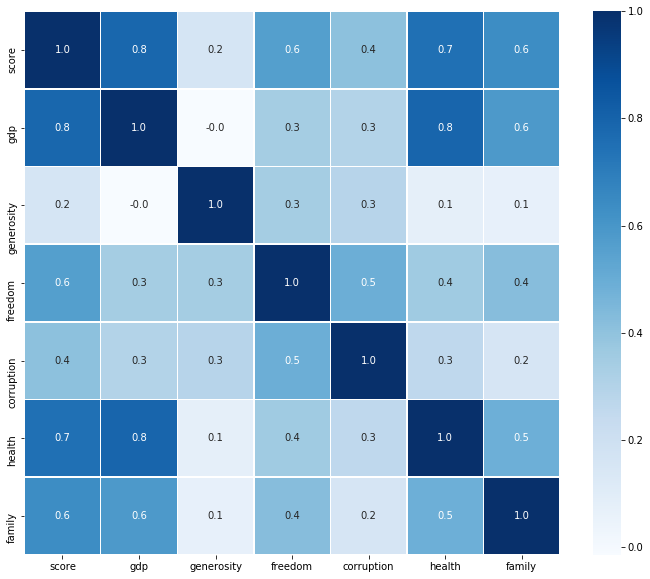

In [33]:
categories = ["score", "gdp", "generosity", "freedom", "corruption", "health", "family"]
fig, ax = plt.subplots(figsize= (12, 10))
sn.heatmap(dim_main_data[categories].corr(), annot=True, cmap="Blues", linewidths=.5, fmt=".1f", ax=ax)
plt.show()



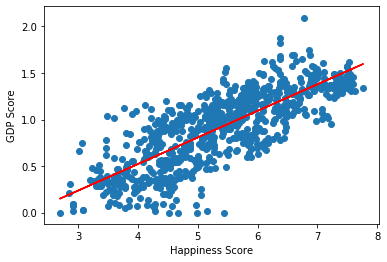

<Figure size 432x288 with 0 Axes>

In [50]:
#since GDP seems to have the greatest correlation with the happiness score, lets look at a linear regresion of the two
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["gdp"].values.reshape(-1,1)



linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["gdp"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("GDP Score")

plt.show()

plt.savefig('Graphs/gdp_score_lineregression.png')


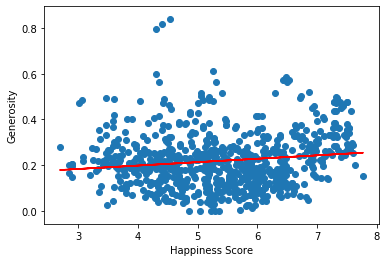

<Figure size 432x288 with 0 Axes>

In [49]:
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["generosity"].values.reshape(-1,1)

linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["generosity"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Generosity")

plt.show()

plt.savefig('Graphs/final_generosity_score_lineregression.png')

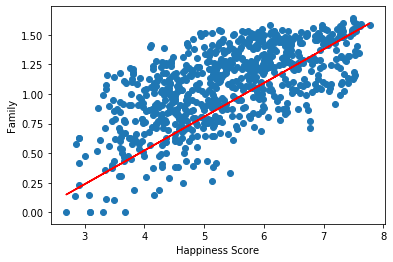

<Figure size 432x288 with 0 Axes>

In [47]:
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["family"].values.reshape(-1,1)

linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["family"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Family")

plt.show()

plt.savefig('Graphs/family_score_lineregression.png')

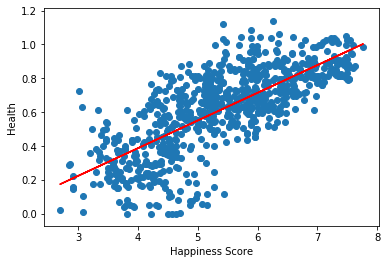

<Figure size 432x288 with 0 Axes>

In [51]:
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["health"].values.reshape(-1,1)

linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["health"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Health")

plt.show()

plt.savefig('Graphs/health_score_lineregression.png')

In [ ]:
#correlation coefficient computation

score = main_data.iloc[:, 2]
gdp = main_data.iloc[:, 3]
correlation = st.pearsonr(score, gdp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

In [ ]:
#main_data = np.random.normal(loc = 20, scale = 5, size=100)   
st.probplot(main_data, dist="norm", plot=pylab)
pylab.show()

